In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.stats import chi2_contingency
import joblib

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.replace('?', np.nan, inplace=True)

### Imputing the missing values by deleting

In [4]:
#delete the rows where the values are missing
df.dropna(inplace = True)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [6]:
# Data cleaning: Standardize education categories
hs_grad = ['HS-grad', '11th', '10th', '9th', '12th']
elementary = ['1st-4th', '5th-6th', '7th-8th']
df['education'].replace(hs_grad, 'HS-grad', inplace=True)
df['education'].replace(elementary, 'elementary_school', inplace=True)

df['education'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_17216\2444899451.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].replace(hs_grad, 'HS-grad', inplace=True)


education
HS-grad              12540
Some-college          6678
Bachelors             5044
Masters               1627
Assoc-voc             1307
Assoc-acdm            1008
elementary_school      996
Prof-school            542
Doctorate              375
Preschool               45
Name: count, dtype: int64

In [7]:
# Data cleaning: Standardize marital status categories
married = ['Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse']
separated = ['Separated', 'Divorced']
df['marital.status'].replace(married, 'Married', inplace=True)
df['marital.status'].replace(separated, 'Separated', inplace=True)

df['marital.status'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_17216\3798892871.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital.status'].replace(married, 'Married', inplace=True)


marital.status
Married          14456
Never-married     9726
Separated         5153
Widowed            827
Name: count, dtype: int64

In [8]:
# Data cleaning: Standardize workclass categories
self_employed = ['Self-emp-not-inc', 'Self-emp-inc']
govt_employees = ['Local-gov', 'State-gov', 'Federal-gov']
df['workclass'].replace(self_employed, 'Self_employed', inplace=True)
df['workclass'].replace(govt_employees, 'Govt_employees', inplace=True)

df['workclass'].value_counts()

C:\Users\amanr\AppData\Local\Temp\ipykernel_17216\1171585778.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace(self_employed, 'Self_employed', inplace=True)


workclass
Private           22286
Govt_employees     4289
Self_employed      3573
Without-pay          14
Name: count, dtype: int64

In [9]:
#convert to csv
df.to_csv('adult_cleaned.csv', index=False)

income
<=50K    22654
>50K      7508
Name: count, dtype: int64


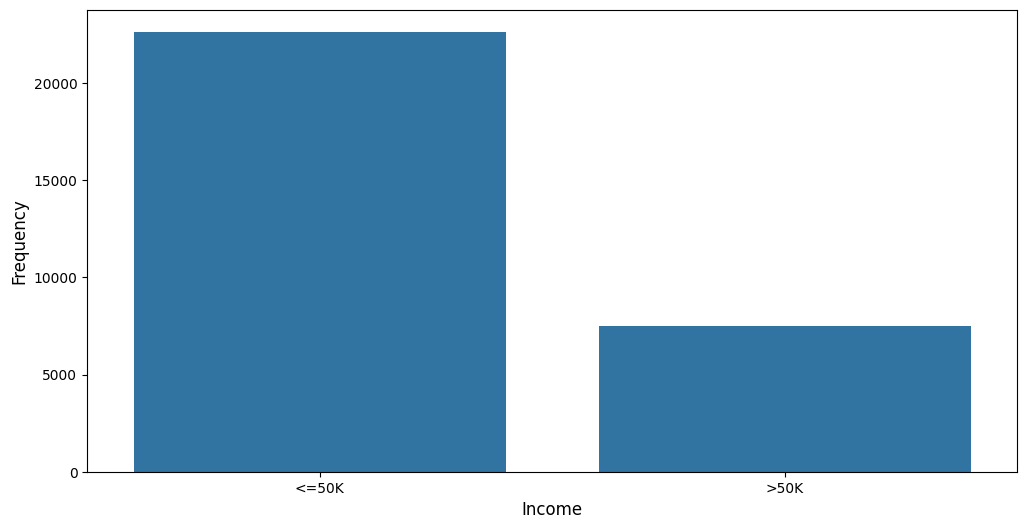

In [10]:
ib = df['income'].value_counts()
print(ib)

plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

In [11]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

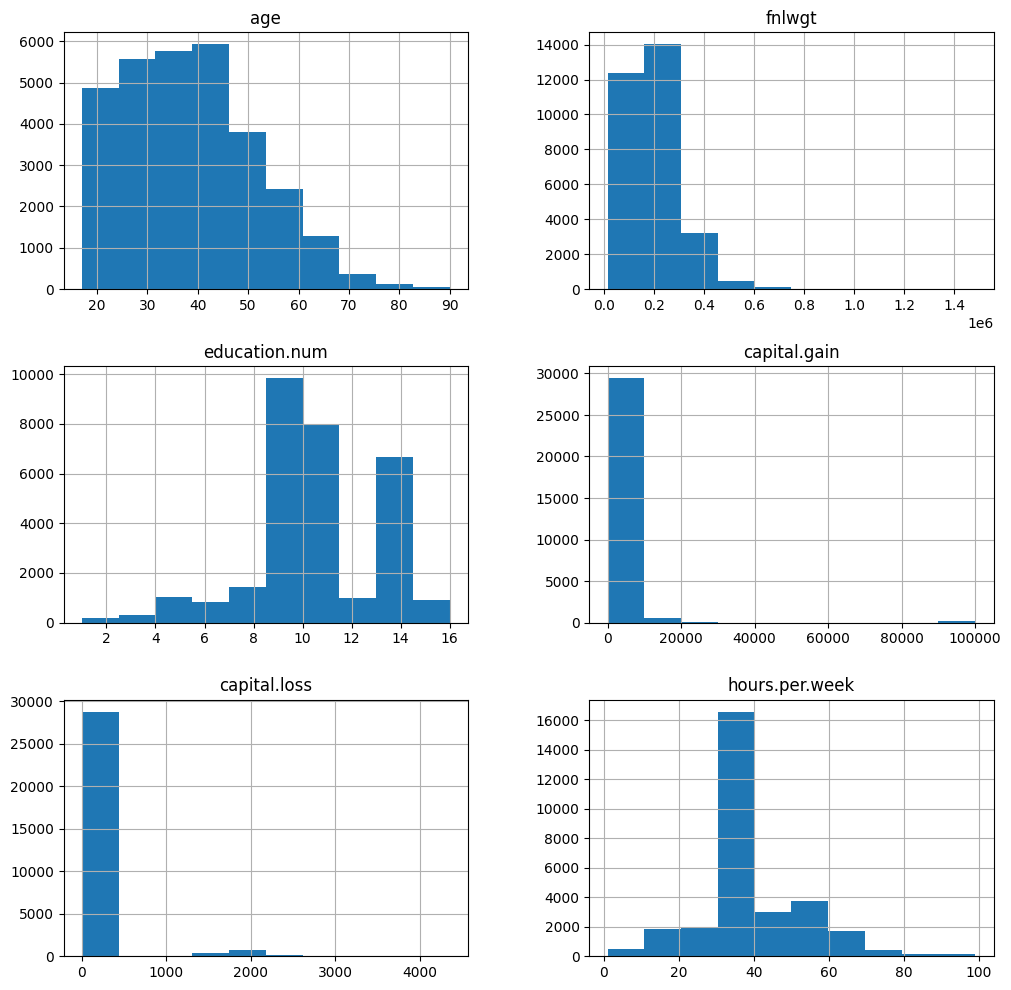

In [12]:
df[list(num_col.index)].hist(figsize = (12,12));

- `age`: In our dataset People from age group of 18 to 50 can be observed.
- `hours per week`: Generally people can be seen working for 30 hours to 40 hours per week.
- `education`: people above 8th grade are more in our dataset.
- Our dataset is highly skewed and we should consider scaling it for better performance of our models.

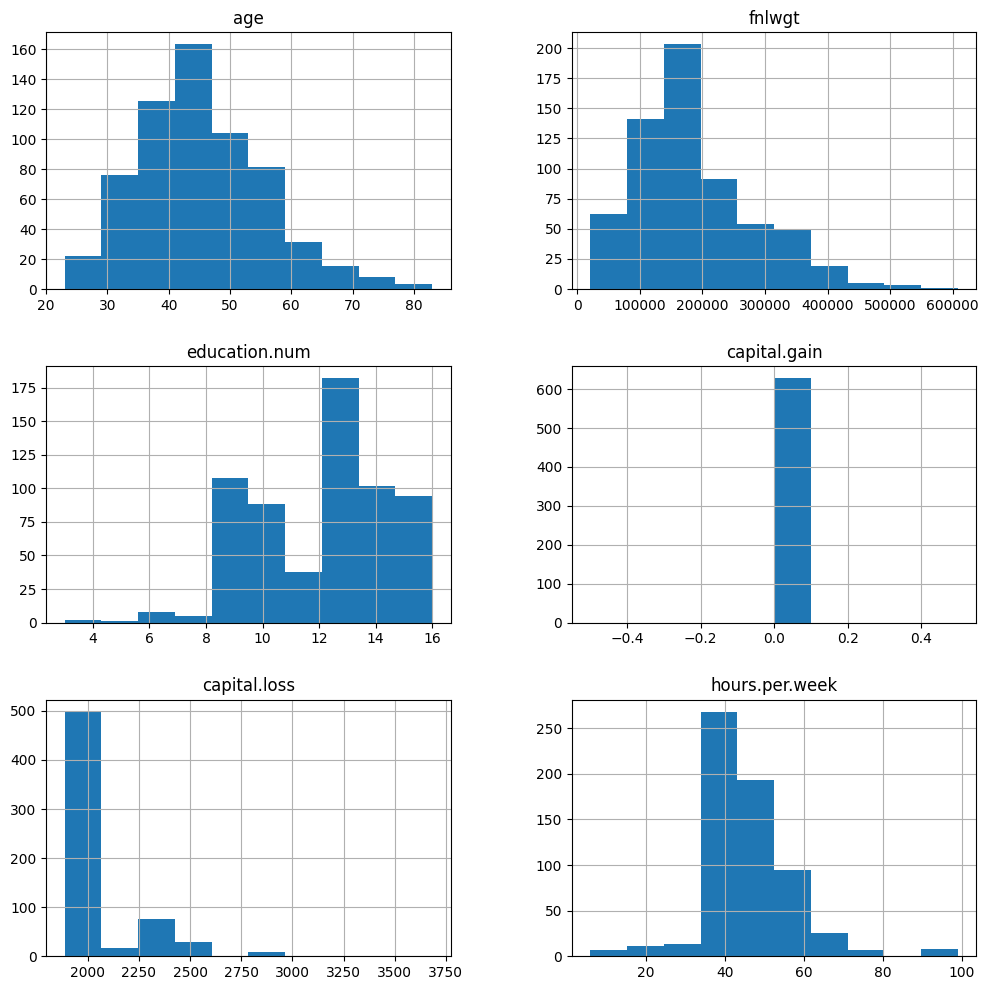

In [13]:
# let's understand characteristics of people having capital loss greater than mean value and having income greater than 50K
df[(df['capital.loss'] >= 1871) & (df['income'] == '>50K')].hist(figsize = (12,12));

- Education and hours per week are significantaly high.
- There are some other factors affecting their loss other than the above.

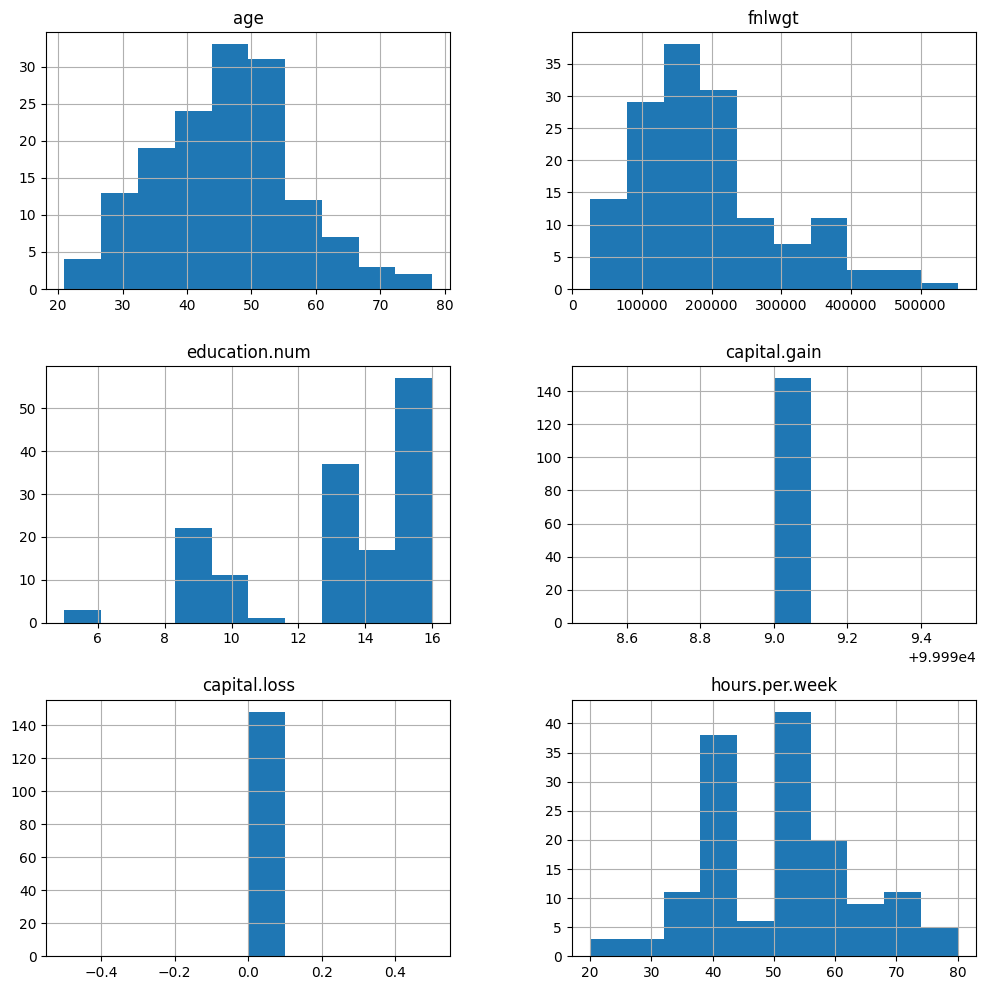

In [14]:
df.loc[df['capital.gain'] == 99999,:].hist(figsize = (12,12));

- Age group and hours per week are fairly distributed for capital gain of 99999.

In [15]:
# Separate features (X) and target variable (y)
selected_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Separate features (X) and target variable (y)
X = df[selected_columns]
y = df['income']

# Chi-square test for categorical variables
chi2_results = []
for column in X.select_dtypes(include='object'):
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': column, 'Chi2': chi2, 'P-value': p})

print("Chi-square Test Results:")
print(pd.DataFrame(chi2_results))

Chi-square Test Results:
          Feature         Chi2        P-value
0       workclass   460.915366   1.406662e-99
1       education  3953.864983   0.000000e+00
2  marital.status  5790.362233   0.000000e+00
3      occupation  3687.620651   0.000000e+00
4    relationship  6233.840454   0.000000e+00
5            race   304.241374   1.317829e-64
6             sex  1415.286404  1.001553e-309
7  native.country   317.736675   6.221222e-45


In [16]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    # print(column.name, le.classes_)
    return le.transform(column)

cols = ['education', 'workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for col in cols:
    df[col] = label_encoder(df[col])

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,1,132870,4,9,3,3,1,4,0,0,4356,18,38,<=50K
3,54,1,140359,9,4,2,6,4,4,0,0,3900,40,38,<=50K
4,41,1,264663,8,10,2,9,3,4,0,0,3900,40,38,<=50K
5,34,1,216864,4,9,2,7,4,4,0,0,3770,45,38,<=50K
6,38,1,150601,4,6,2,0,4,4,1,0,3770,40,38,<=50K


<Axes: >

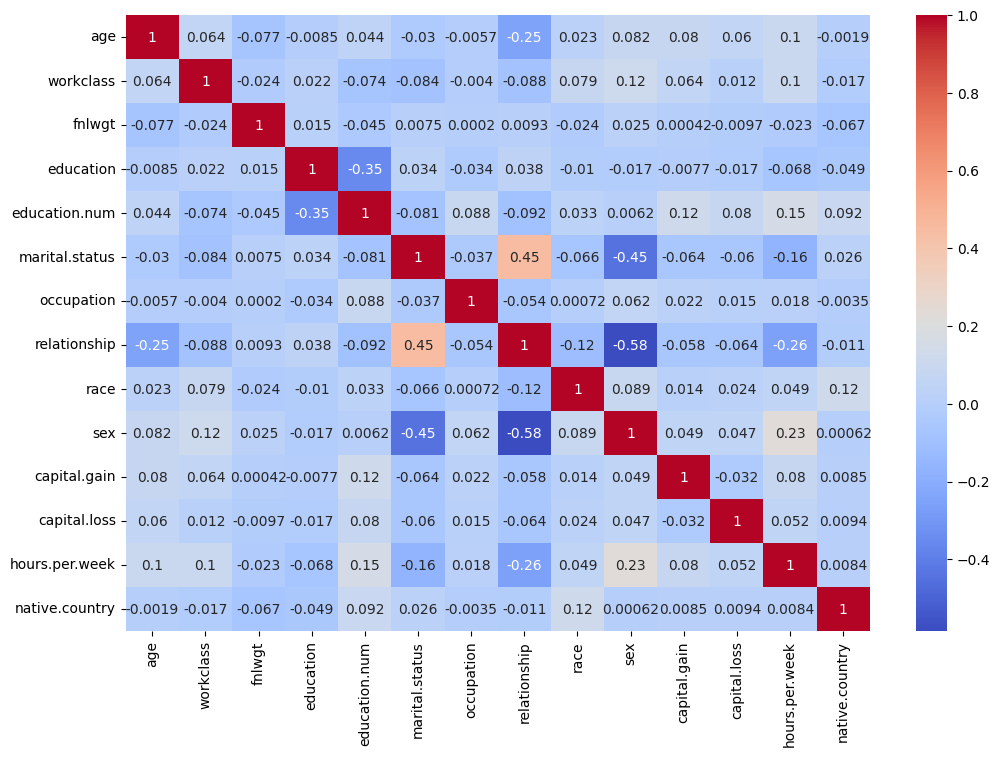

In [17]:
# df['income']

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

kNN

In [18]:
# convert to csv
df.to_csv('adult_cleaned.csv', index=False)

In [19]:
X = df.drop(['income', 'fnlwgt', 'native.country','workclass','occupation', 'race','relationship','sex'], axis=1)
y = df['income']

In [20]:
print(X.columns)

Index(['age', 'education', 'education.num', 'marital.status', 'capital.gain',
       'capital.loss', 'hours.per.week'],
      dtype='object')


In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [22]:
# split the data into train and validate sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [23]:
# Standrize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [24]:
#choosing the best k value based on f1 score
k_values = range(1, 20)
f1_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    f1_scores.append(metrics.f1_score(y_val, y_pred, pos_label='>50K'))



In [25]:
#print the value of k for which f1 score is maximum
k = k_values[np.argmax(f1_scores)]
print("Best k value:", k)

Best k value: 1


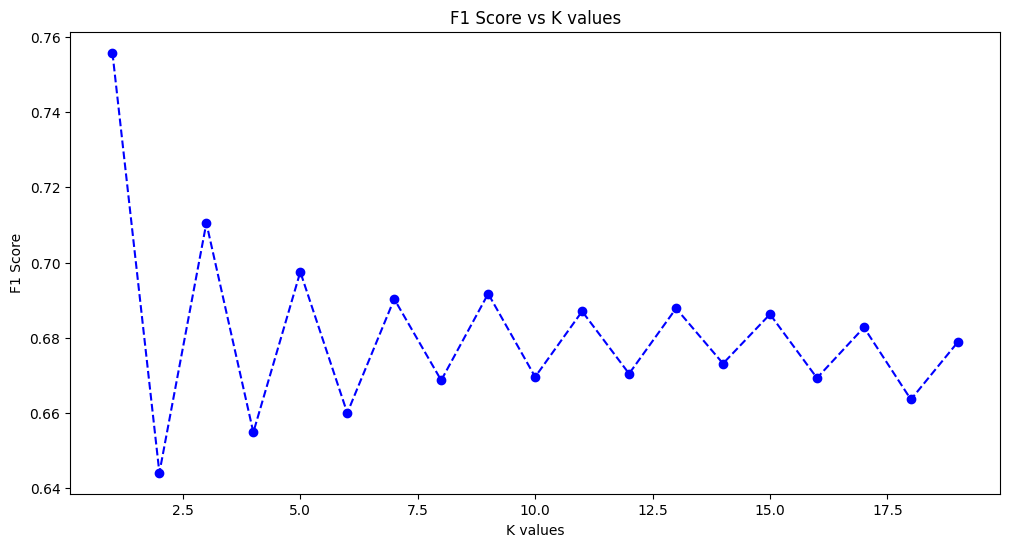

In [26]:
#plot the f1 score for different k values
plt.figure(figsize=(12, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='--', color='b')
plt.xlabel('K values')
plt.ylabel('F1 Score')
plt.title('F1 Score vs K values')
plt.show()

In [27]:
#fit the model using the best k value
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [28]:
# get predictions and probability of default on the validate set
y_pred = knn.predict(X_val)
y_pred_prob = knn.predict_proba(X_val)

In [29]:
# Evaluate the model on validation set
print("Validation Set Evaluation:")
cm = metrics.confusion_matrix(y_val, y_pred)    
print(cm)


Validation Set Evaluation:
[[10282  1019]
 [  865  2915]]


Text(120.72222222222221, 0.5, 'Actual')

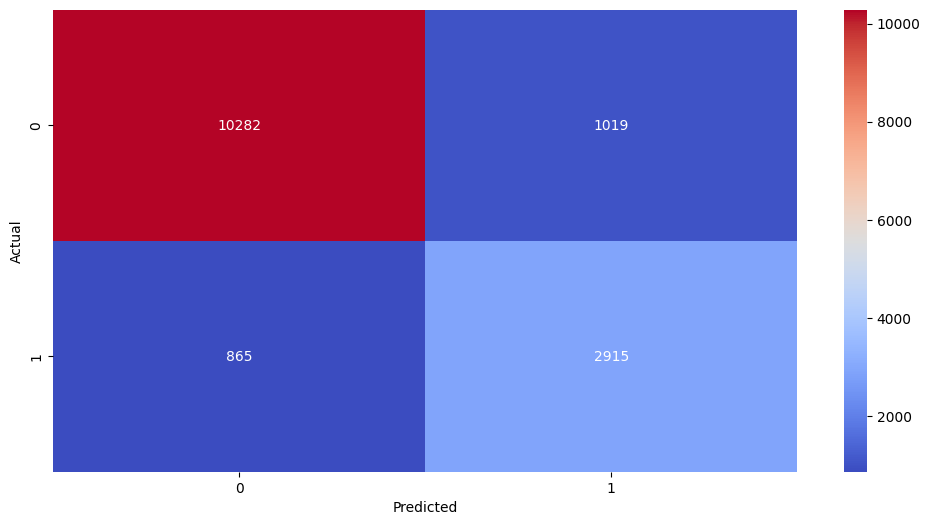

In [30]:
#plot the confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
print("Classification Report:")
print(metrics.classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.92      0.91      0.92     11301
        >50K       0.74      0.77      0.76      3780

    accuracy                           0.88     15081
   macro avg       0.83      0.84      0.84     15081
weighted avg       0.88      0.88      0.88     15081



In [32]:
# Save the best model to a file
joblib.dump(knn, 'z.pkl')

['z.pkl']